In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
# Importing the dataset
dataset = pd.read_csv('./data/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [6]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [7]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

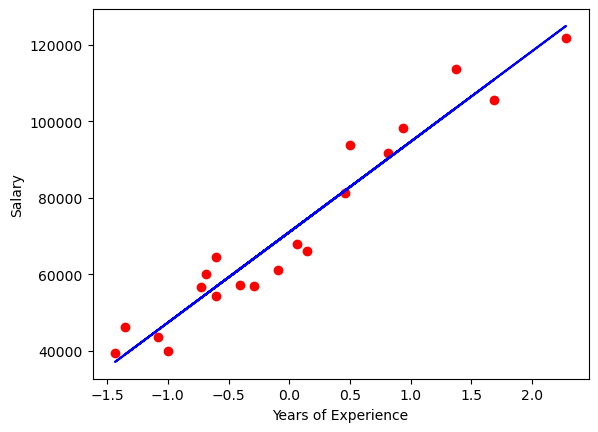

In [10]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

In [11]:
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error 4585.4157204675885


In [12]:
SS_Residual = sum((y_test-y_pred)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total

print("R Squared", r_squared)

R Squared 0.9749154407708353


In [13]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9740195636555079


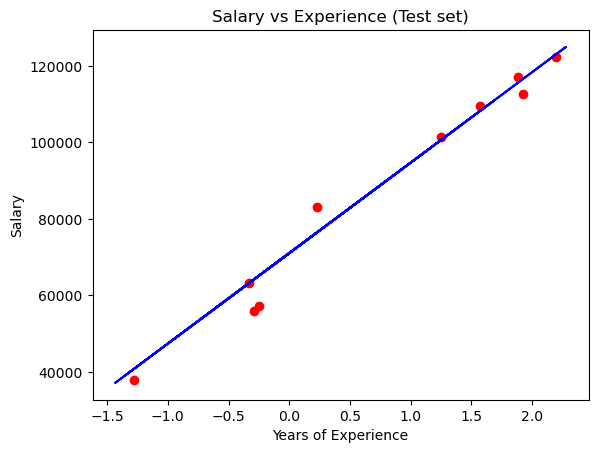

In [14]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()